## Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Reading data and its stucture

In [5]:
data = pd.read_excel('data.xlsx')


In [6]:
data.shape

(377719, 7)

In [7]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


### Replacing all the text values in the columns with NaN's

In [9]:
data.replace(to_replace ='^[A-Z].*', value = np.nan, regex = True, inplace= True)


In [10]:
data1 = data.loc[:, data.columns != 'time'].astype(str).astype(float) # converting the datatype of column values from object to float except for time column
# inserting time column at first position in the data frame
data1.insert(loc = 0,
          column = 'time',
          value = data['time'])

In [11]:
data.set_index('time', inplace = True) #setting time column as index 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377719 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    376399 non-null  float64
 1   Cyclone_Material_Temp     376128 non-null  float64
 2   Cyclone_Outlet_Gas_draft  376398 non-null  float64
 3   Cyclone_cone_draft        376399 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   376398 non-null  float64
 5   Cyclone_Inlet_Draft       376397 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB


Here all the datatypes of columns are changed to float64

In [13]:
data.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
std,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [14]:
data.isna().sum() # checking the number of number of null values in the each column.

Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

Now, we drop or remove or fill the null values in each column

In [15]:
data.dropna(how = 'all', inplace=True) # here we dropped the null values rows if all the corresponding columns rows also contains null values
data.Cyclone_Inlet_Draft.fillna(data.Cyclone_Inlet_Draft.mean(), inplace = True) # here we fill the null value with the mean of the column
data.Cyclone_Outlet_Gas_draft.fillna(data.Cyclone_Outlet_Gas_draft.mean(), inplace = True) # here we fill the null value with the mean of the column
data.Cyclone_Gas_Outlet_Temp.fillna(data.Cyclone_Gas_Outlet_Temp.mean(), inplace = True) # here we fill the null value with the mean of the column
data.Cyclone_Inlet_Gas_Temp.fillna(data.Cyclone_Inlet_Gas_Temp.mean(), inplace = True)
data.dropna(inplace = True) # here we dropped the whole rows even if one cell contains the null value.

In [16]:
data.reset_index(level=0, inplace=True) # now we reset the index as column in df
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


## Statistical properties

In [17]:
data.corr()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,1.000000,-0.161763,-0.166341,-0.008367,0.112382,-0.145821,0.009517
Cyclone_Inlet_Gas_Temp,-0.161763,1.000000,0.964728,-0.903011,-0.899630,0.990966,-0.901797
Cyclone_Material_Temp,-0.166341,0.964728,1.000000,-0.880614,-0.877584,0.957381,-0.879355
Cyclone_Outlet_Gas_draft,-0.008367,-0.903011,-0.880614,1.000000,0.968420,-0.898709,0.995433
Cyclone_cone_draft,0.112382,-0.899630,-0.877584,0.968420,1.000000,-0.893082,0.969439
Cyclone_Gas_Outlet_Temp,-0.145821,0.990966,0.957381,-0.898709,-0.893082,1.000000,-0.898501
Cyclone_Inlet_Draft,0.009517,-0.901797,-0.879355,0.995433,0.969439,-0.898501,1.000000


As we can see that the inlet gas temp, outlet gas temp and material temp form a group of highly positive correlation.
Inlet draft, outlet draft and cone draft form another group are highly positive,correlation.
But both the groups are highly negatively correlated with each other.

## Visualizing the data



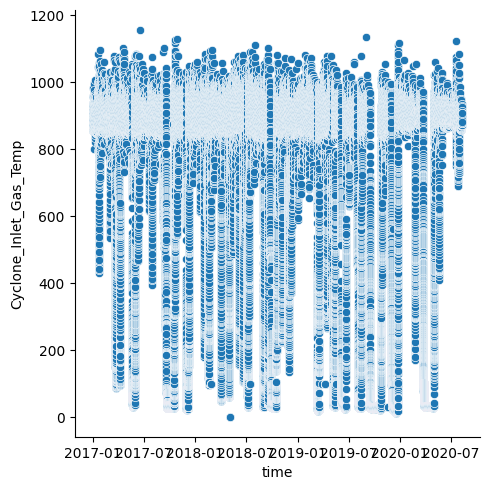

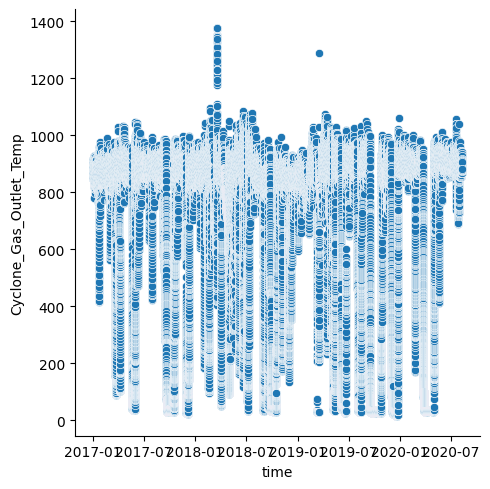

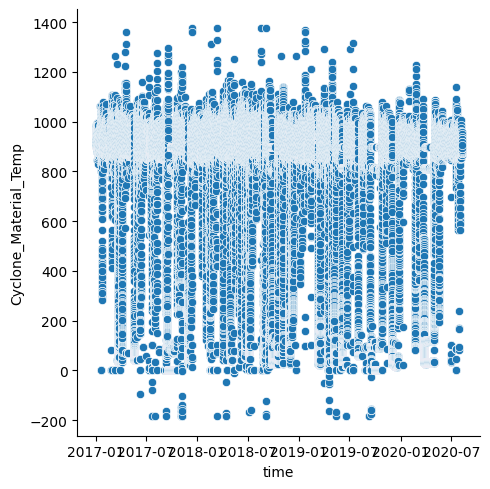

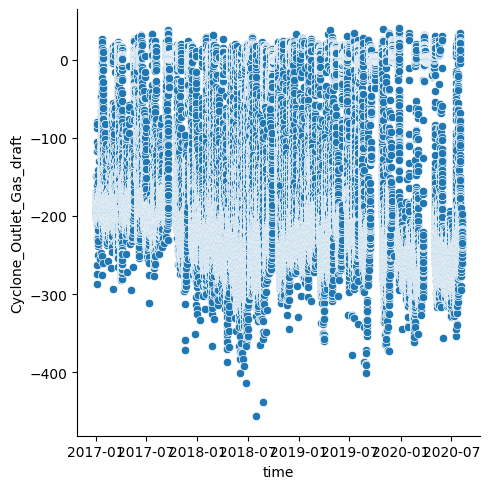

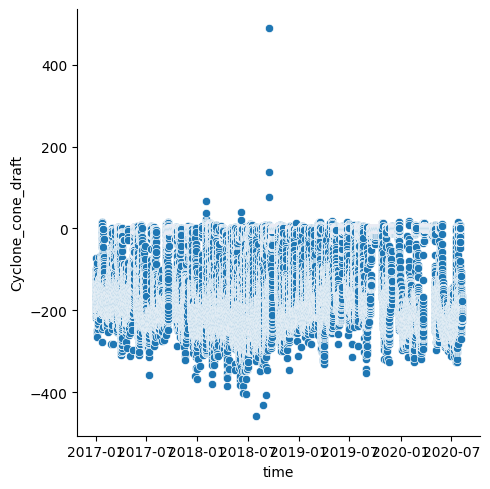

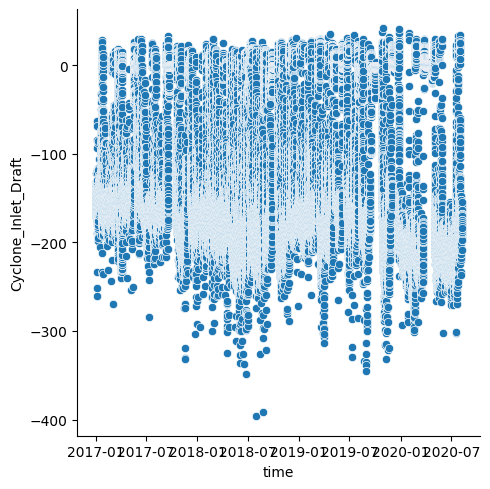

In [18]:
cols = ['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']
for i in cols:
    sns.relplot(data=data.reset_index(),x='time', y=i)

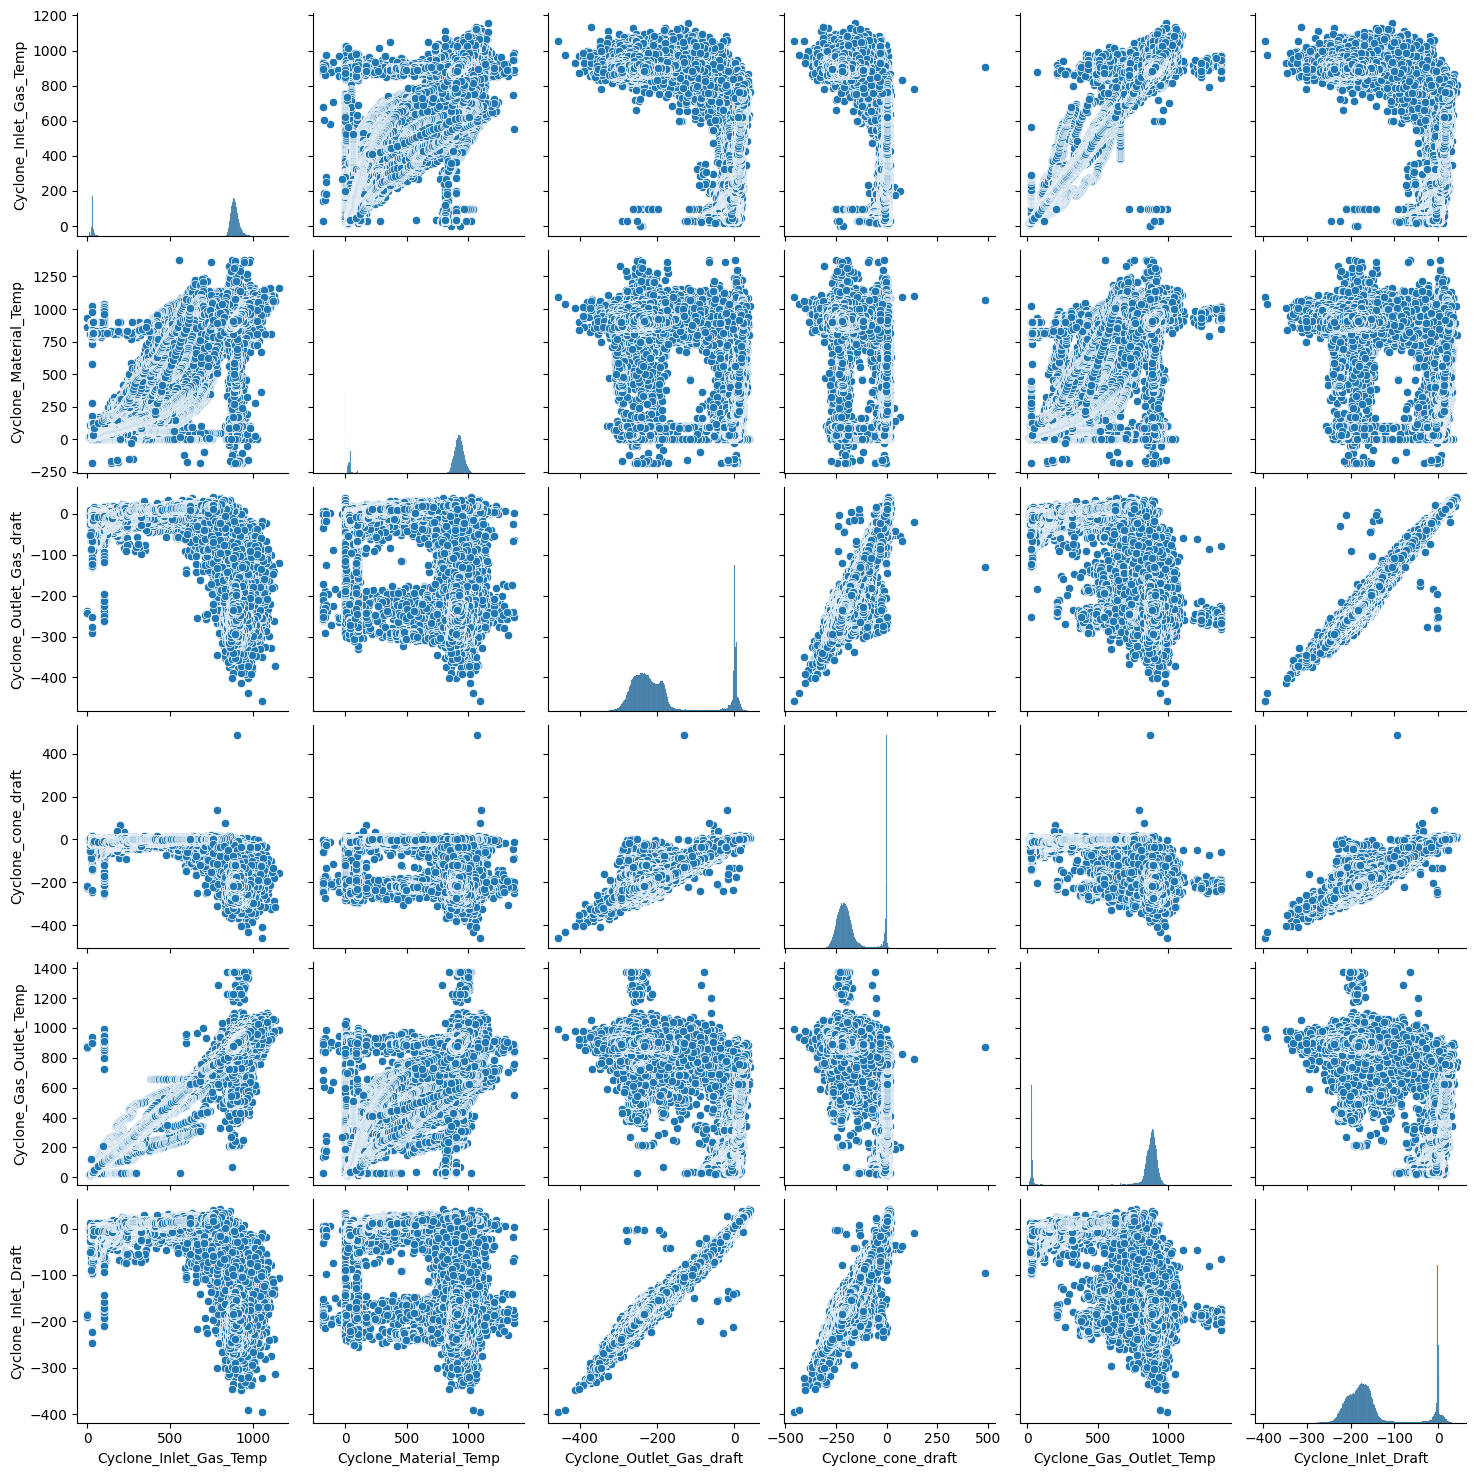

In [19]:
sns.pairplot(data)

<Axes: >

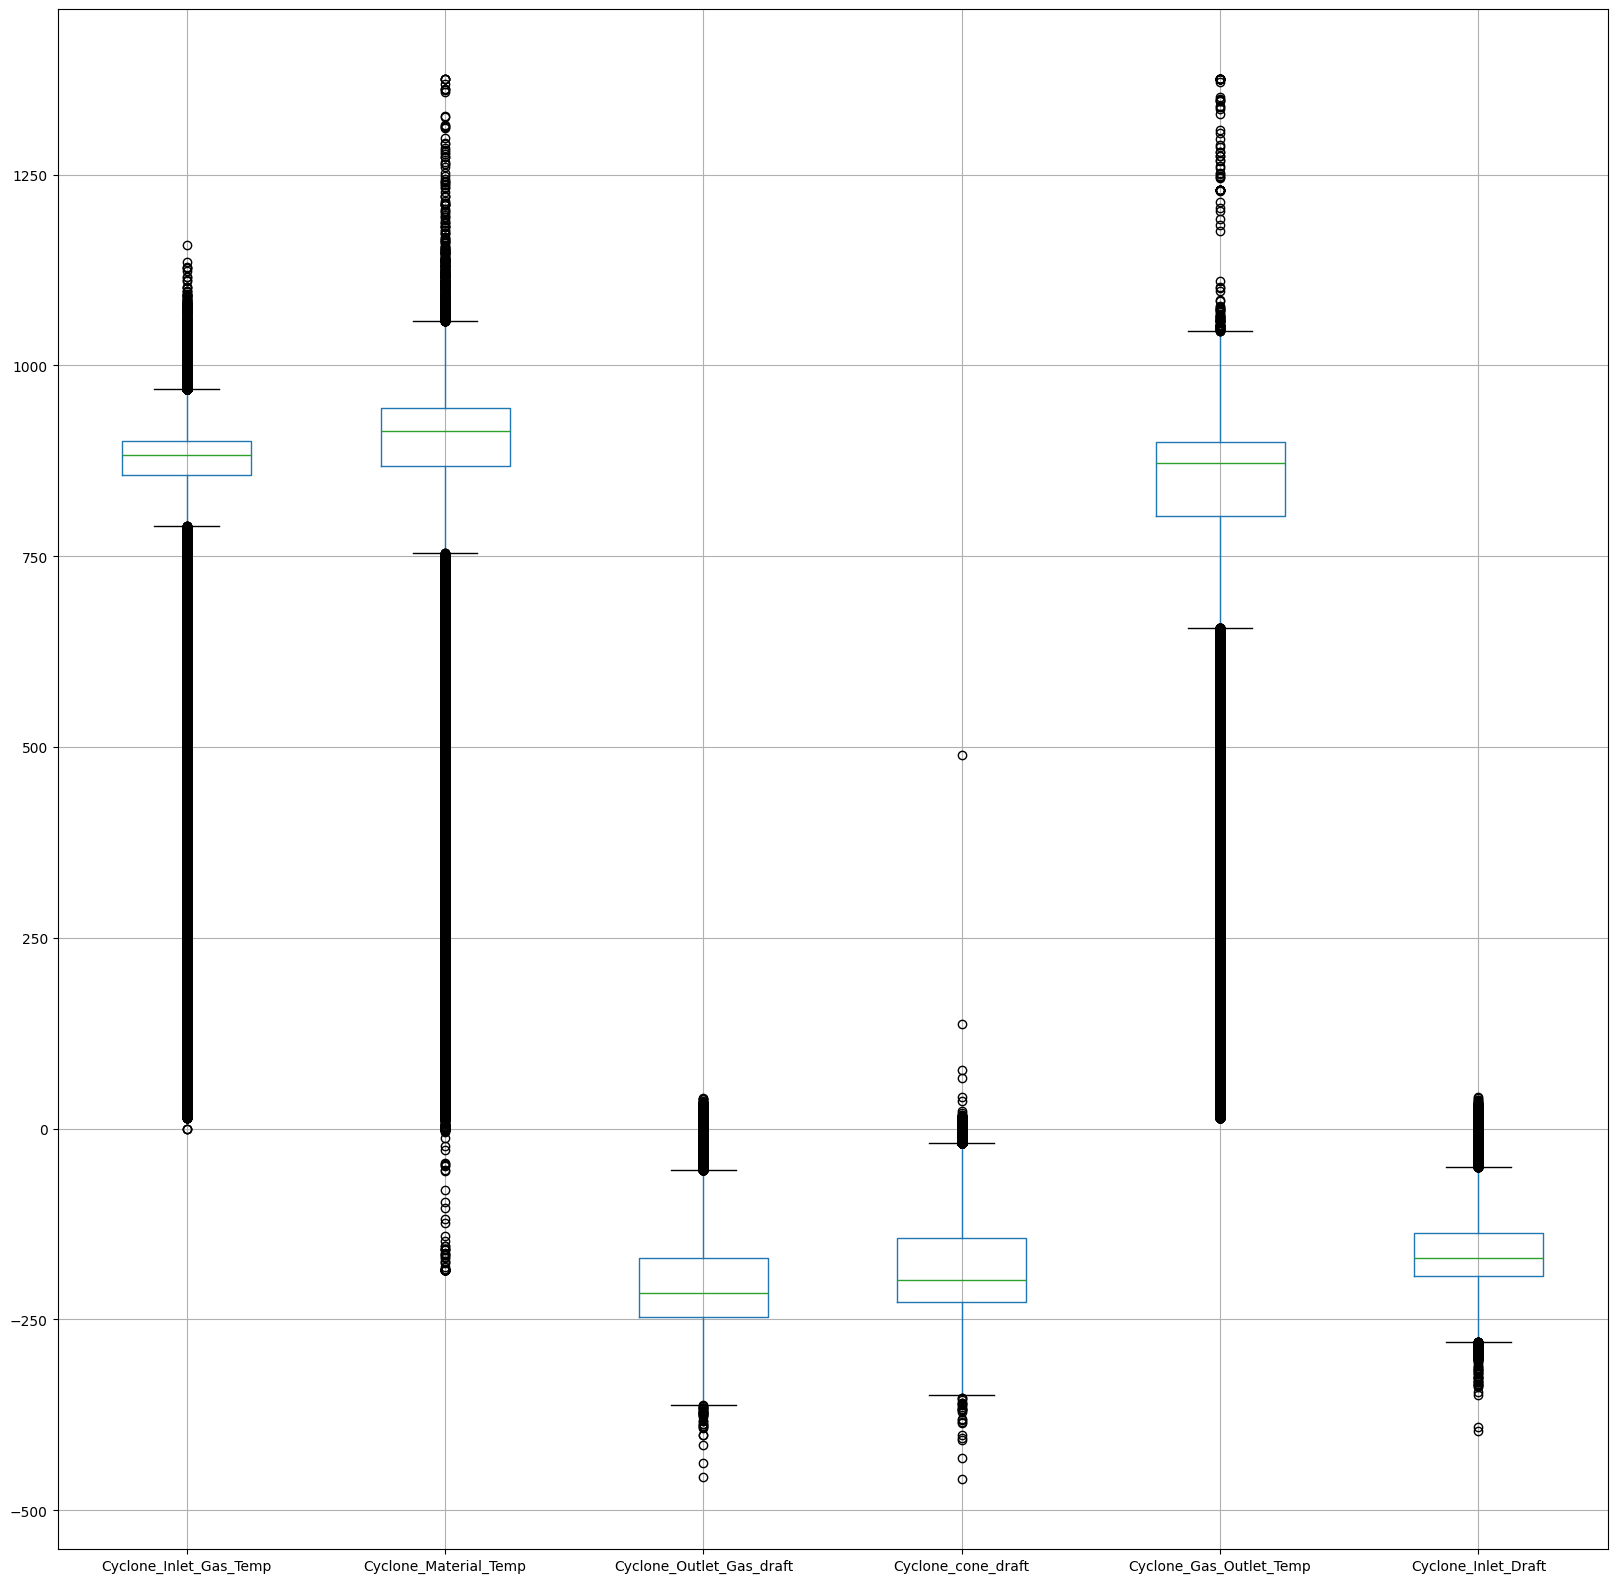

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
data.boxplot()

From the boxplot we can determine the presense of outliers in the data along with the shape of data.

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

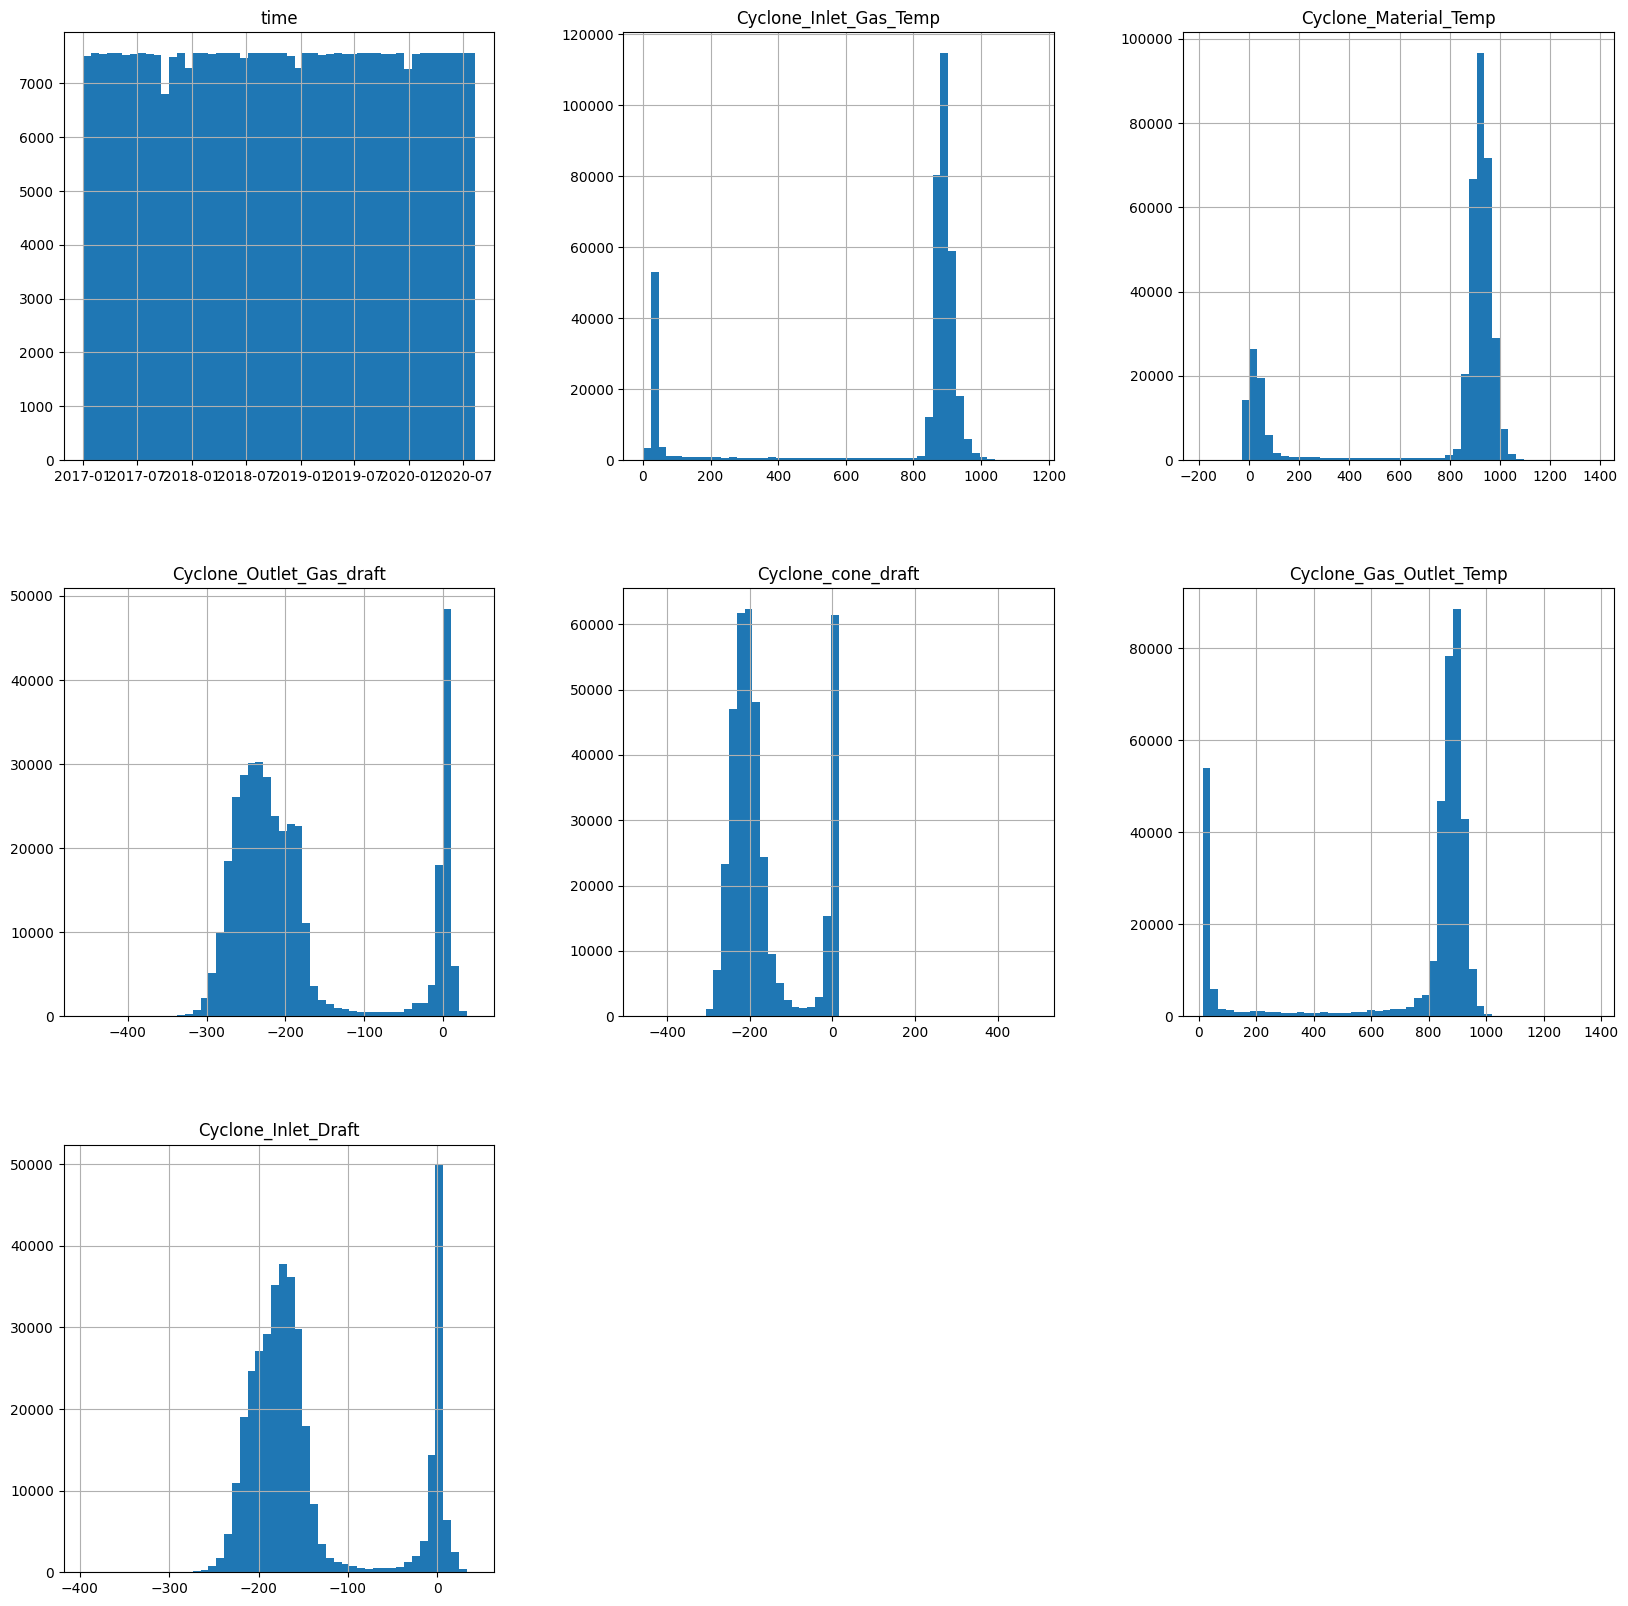

In [21]:
data.hist(bins=50, figsize=(20,20))

From the above histograms we can say that our data is not normal at any feature. It is bimodal in some case like in draft attributes but in the other three temperature variables the data mainly lies on the tails of the histogram leaving very few values in the middle.

## Implementing Anomaly detection algorithm with clustering

Now we try to implement Isolation Forest with K-means clustering to detect the outliers in the data

##### 
Defining functions to apply lagging, k-means clustering and isolation algorithms.

In [22]:
def lagging(dff):
    df_shift1=dff.shift(1)
    df_shift2=dff.shift(2)
    df_shift3=dff.shift(3)
    df_shift4=dff.shift(4)
    df_shift5=dff.shift(5)

    df_shifted = pd.concat([df_shift1,df_shift2,df_shift3,df_shift4,df_shift5],axis=1)
    print("***data shifted columns*** ",df_shifted.columns)
    df_shifted.fillna(0.0,inplace=True)
    unique_names = pd.Series(df_shifted.columns).groupby(pd.Series(df_shifted.columns)).cumcount().astype(str)
    unique_names[unique_names == '0'] = ''
    print("***unique_names of data shifted columns*** ", unique_names)
    # change the column names to unique names
    df_shifted.columns = df_shifted.columns + '_' + unique_names
    # Remove comment if want to apply lagging in the data  
    dff=df_shifted
    return dff

##### 
apply_clustering will build n_clusters(defined by user) and it also calculated mean, percentage of values in each cluster.

In [23]:
def apply_clustering(df, n_clusters):
    # Create a copy of the input DataFrame and fill missing values
    df_copy_new = df
    # Standardize the data
    scaler = StandardScaler()
    

    X = df_copy_new.values
    X_1 = X.reshape(X.shape[0], X.shape[1])
    X_scaled = scaler.fit_transform(X_1)

    # Create a KMeans object and fit the data
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)

    # Get the cluster labels and cluster centers
    labels = kmeans.labels_
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    print("***k-means labels & centers", labels, centers)
    # Add the cluster labels to the DataFrame
    df_copy_new['clusters'] = labels

    # Add empty 'per', 'mean', 'zscore', and 'pval' columns to the DataFrame
    df_copy_new['per'] = np.nan
    df_copy_new['mean'] = np.nan
    
    # Compute the percentage, mean, z-score, and p-value for each cluster
    for i in range(n_clusters):
        df_cluster = df_copy_new
        df_cluster = df_cluster.reset_index(drop=True)
        cluster_percentage = len(df_cluster) * 100 / len(df_copy_new)
        df_cluster['per'] = cluster_percentage
        mean_cols = [col for col in df_cluster.columns if col not in ['time', 'date', 'clusters', 'per']]
        if len(mean_cols) > 0:
            mean = df_cluster[mean_cols].mean().mean()
        else:
            mean = np.nan
        df_copy_new.loc[df_copy_new['clusters'] == i, 'per'] = cluster_percentage
        df_copy_new.loc[df_copy_new['clusters'] == i, 'mean'] = mean
    print(df_copy_new)
    return df_copy_new

#####
clean_data function will basically used to call lagging(depends on user to use this during clean_data call `True/False`) and clustering functions defined above, and it will use `isolation forest` algorithm where contamination is defined by user. This will give us -1 and 1 score for each data point where -1 represents outlier. 

This function will also calculate `anomaly table` where percentage column store percentage of data points where score is -1 in each cluster. If any cluser percentage value in anomaly table is less than `15%`, those cluster data points will be considered as outlier and removed from the final data frame.

There is also a choice to remove clusters where percentage of data points in each cluster calculated from `apply_function` is less than 15%. This will remove those clusters before applying isloation forest. To use this, make `clean_with_cluster` parameter `True` in function call.




In [24]:
def clean_data(dff,apply_lagging,contamination,clean_with_cluster):
    if apply_lagging:
        dff = lagging(dff)

    ## removing Nan
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)

    dff = dff.dropna()
    print ("Total Nan found train : ",dff.isnull().sum().any())
    print("shape of dff ",dff.shape)

    n_clusters=6
    df_copy_new = apply_clustering(dff, n_clusters)
    if clean_with_cluster:
        df_copy_new = df_copy_new[df_copy_new['per']>=15]
    clf = IsolationForest(random_state=0,contamination=contamination,n_estimators=300).fit(df_copy_new)

    # Predict the inliers and outliers
    y_pred = clf.predict(df_copy_new)
    # Filter the data to only include the inliers
    # X_filtered = df_copy_new[y_pred == 1]

    y_pred_df_new = pd.concat([df_copy_new, pd.DataFrame(data=y_pred, index=df_copy_new.index, columns=['anomaly'])], axis=1)
    anomaly_table = y_pred_df_new.pivot_table(values=["mean"],columns=["anomaly"],index=["clusters"],aggfunc=len,fill_value=0)
    print('***anomaly table***', anomaly_table)
    # Calculate the percentage of -1 anomalies for each cluster
    if -1 in y_pred:
        anomaly_table['percentage'] = anomaly_table[('mean', -1)] / (anomaly_table[('mean', -1)] + anomaly_table[('mean', 1)])*100
        print(anomaly_table)
        # Filter the clusters with percentage greater than 15%
        filtered_clusters = list(anomaly_table[anomaly_table['percentage'] >15.0].index)
        # Create a new dataframe with the filtered clusters
        outlier_df = y_pred_df_new[y_pred_df_new['clusters'].isin(filtered_clusters)]
        # get the index of rows present in the outlier dataframe
        outlier_index = outlier_df.index
        # filter out rows from the original dataframe that are present in the outlier dataframe
        inlier_df = y_pred_df_new.loc[~y_pred_df_new.index.isin(outlier_index)]
    else:
        # All data is inliers
        inlier_df = y_pred_df_new

    inlier_df = inlier_df.drop(['clusters', 'per', 'mean', 'anomaly'], axis=1)
    shape=inlier_df.shape
    if apply_lagging:
        inlier_df= inlier_df[inlier_df.columns[:len(dff.columns)+1]]
        inlier_df.columns = inlier_df.columns.str.rsplit('_', n=1).str[0]
        shape=inlier_df.shape
    print("Total Nan found inlier_df : ",inlier_df.isnull().sum().any())
    return inlier_df

In [25]:
if 'time' in data.columns:
    data.set_index('time', inplace=True)
data = clean_data(data,apply_lagging=False,contamination=0.20,clean_with_cluster=False)

Total Nan found train :  False
shape of dff  (376128, 6)
***k-means labels & centers [2 2 2 ... 1 1 1] [[  44.39548053   33.90268889   -1.49234922   -4.01889831   44.35215461
    -3.67070236]
 [ 891.06548452  922.10915518 -228.34677596 -209.85531424  874.31452065
  -179.20059575]
 [ 887.58932467  919.43115407 -185.8597192  -173.20738427  877.43339726
  -150.06980049]
 [ 363.35434722  361.3622838     6.22574577   -4.15555049  354.8586591
     4.97355868]
 [ 900.36701791  928.60616815 -267.1628236  -243.96969416  887.01769295
  -211.625746  ]
 [ 724.35567739  808.50369743  -13.62695032  -25.53766864  699.37183743
    -9.35819967]]
                     Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
time                                                                 
2017-01-01 00:00:00                  867.63                 910.42   
2017-01-01 00:05:00                  879.23                 918.14   
2017-01-01 00:10:00                  875.67                 924.18   
2017-01-01 00

In [26]:
data.shape

(208478, 6)

array([[<Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>],
       [<Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Draft'}>]], dtype=object)

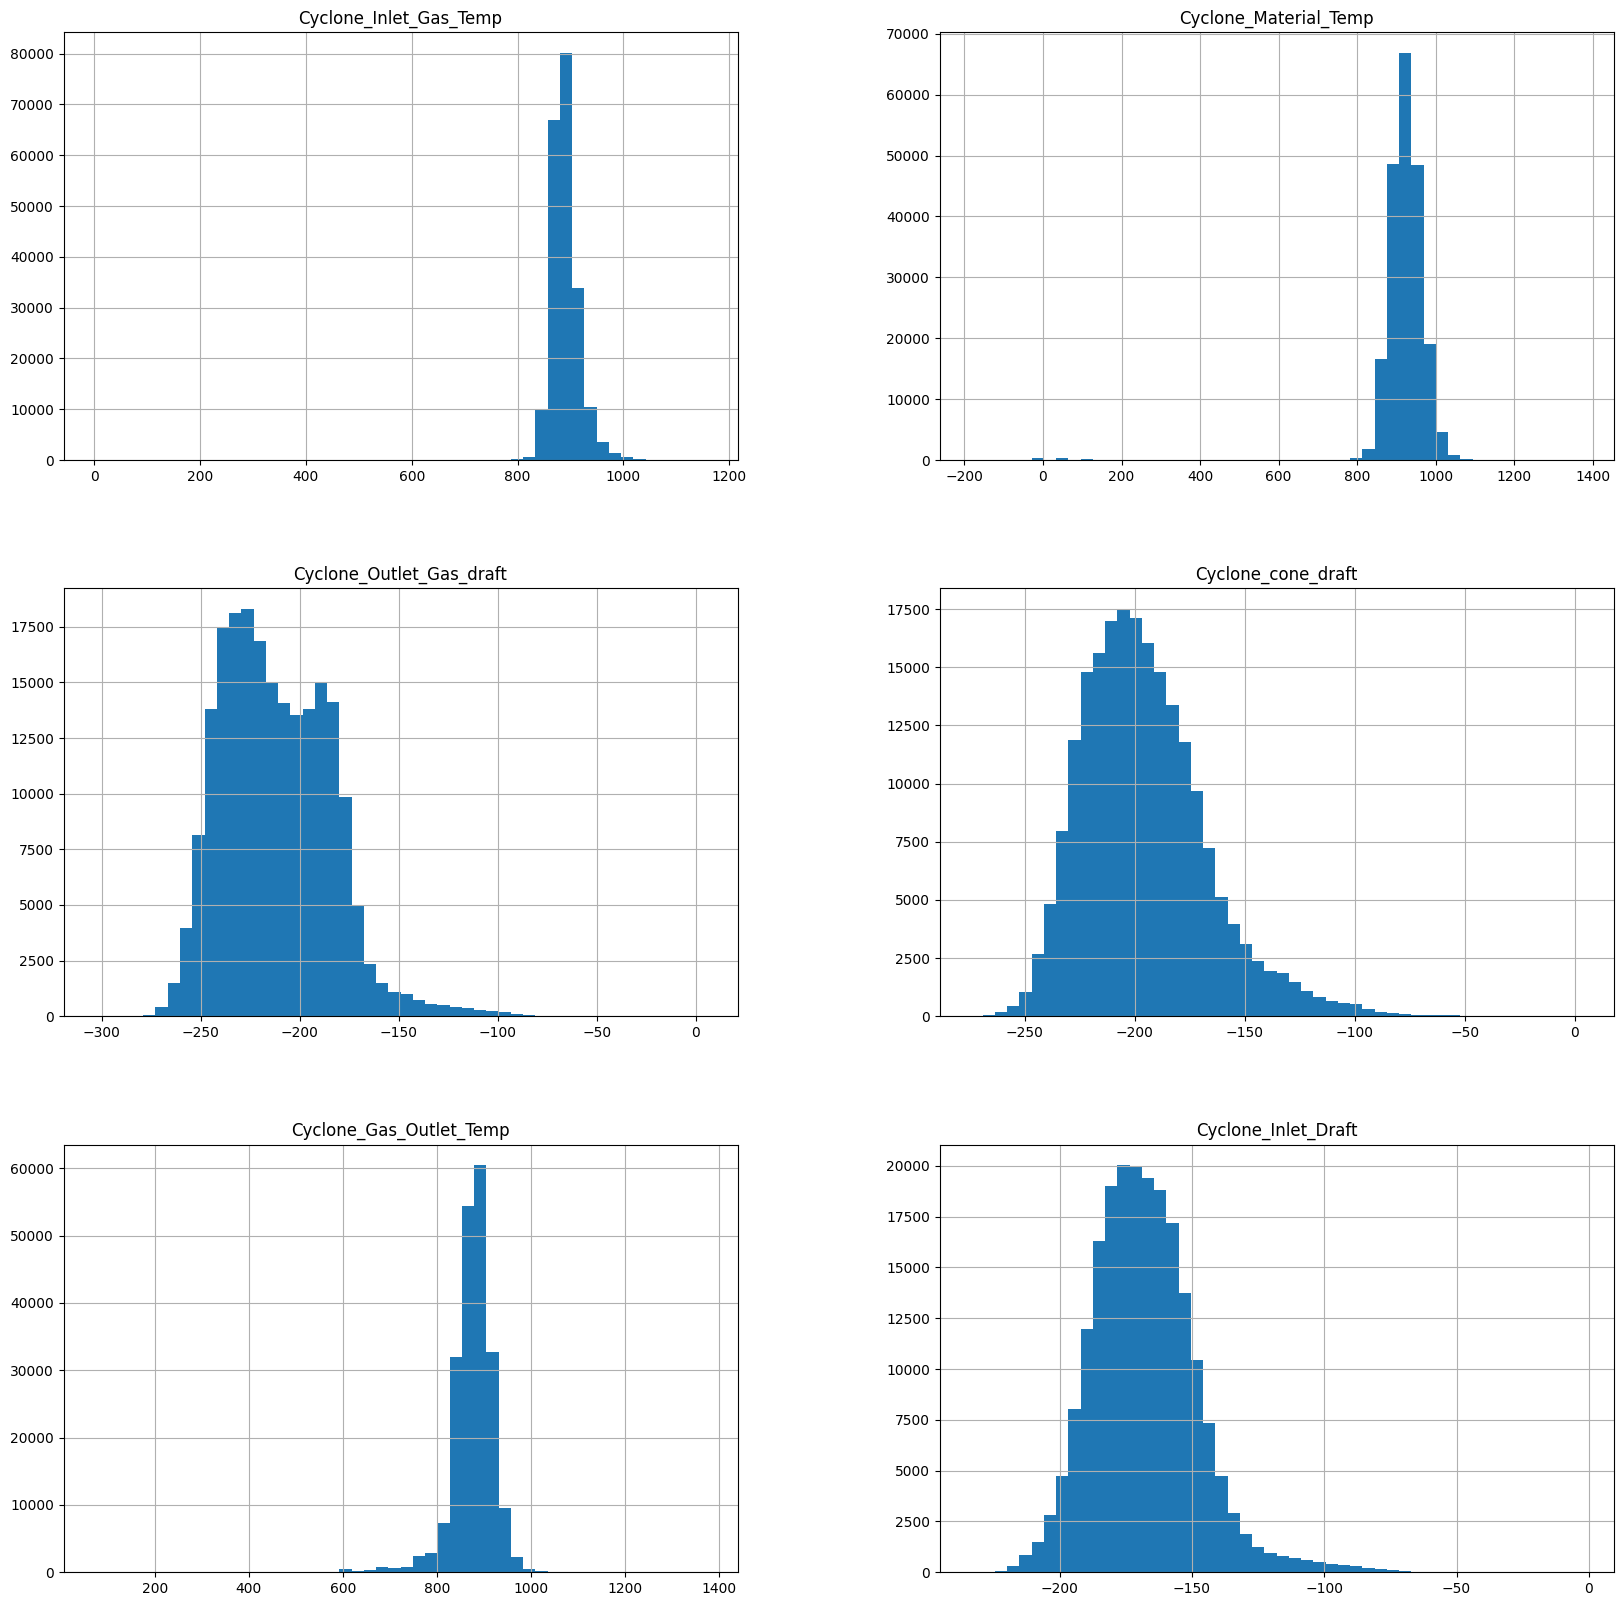

In [27]:
data.hist(bins=50, figsize=(20,20))

Compared with previous histograms, most of the outliers are removed as data shape is normal(with some skewness).

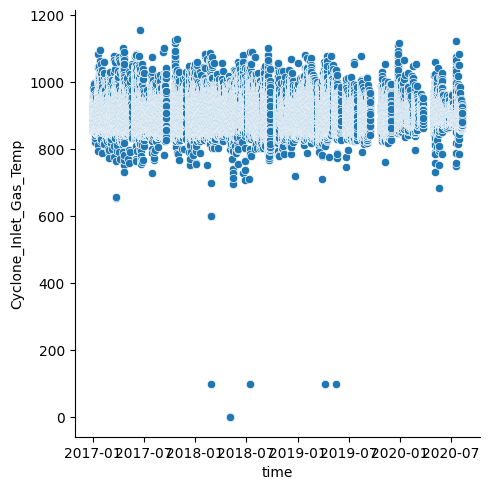

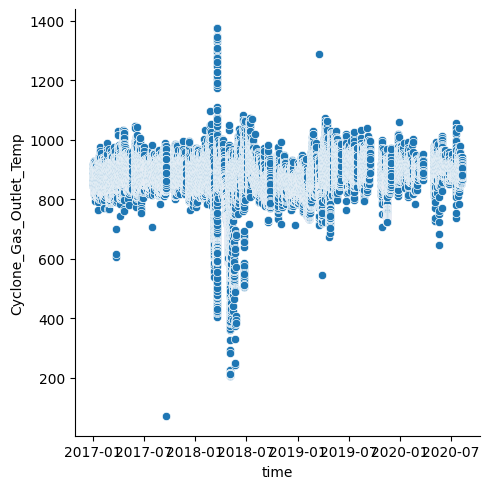

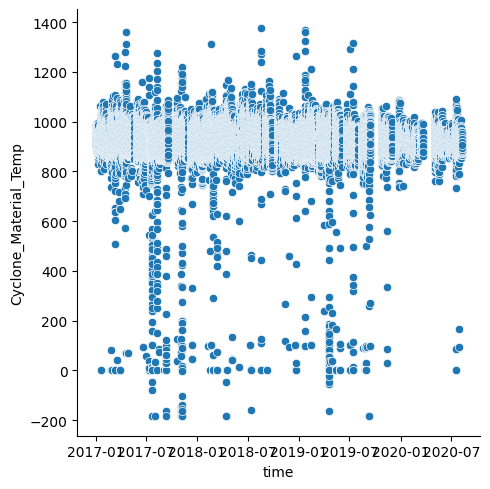

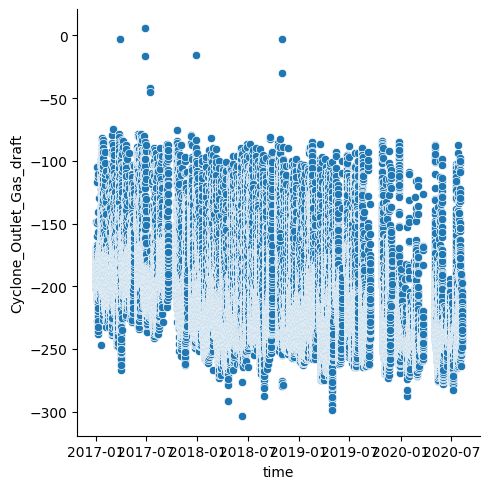

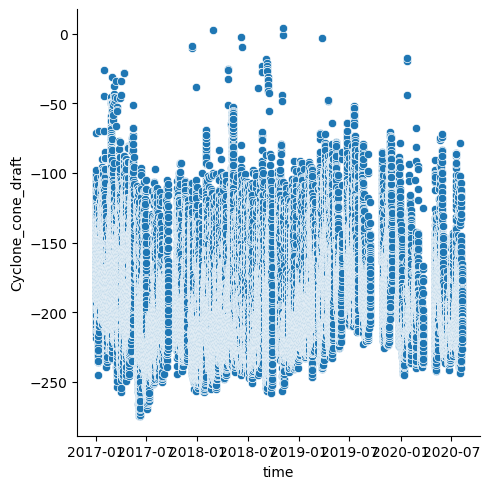

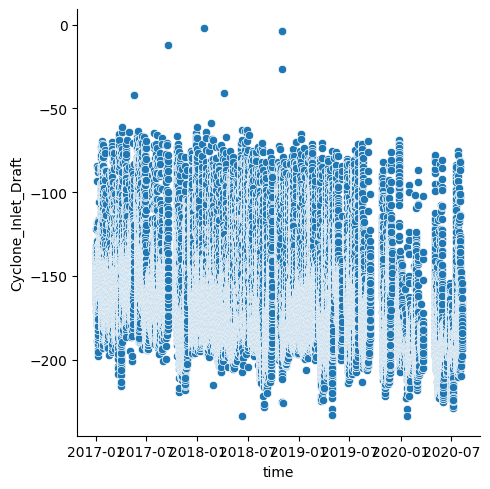

In [28]:
cols = ['Cyclone_Inlet_Gas_Temp','Cyclone_Gas_Outlet_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']
for i in cols:
    sns.relplot(data=data.reset_index(),x='time', y=i)

From the above scatter plot for each colum, most of the outliers removed compared with the previous scatter plot generated in `visualizing section`.